In [1]:
import sys
sys.path.append('../SpectralMechanicsAnalysis')
from simulations import simulate_diffusing_harmonic
import matplotlib.pyplot as plt
import numpy as np
from MBR_calculation import analytical_mean_back_realxation, mean_back_realxation, mean_back_relaxation_multiple_trajectories, mean_back_relaxation_multiple_trajectories_with_timestamps, mean_back_relaxation_with_timestamps

In [2]:
T_simulation = 10000
dt = 0.01
k = 1
d_particle = 1
d_oscilator = .3
x,_ = simulate_diffusing_harmonic(T_simulation, dt, k, d_particle, d_oscilator)

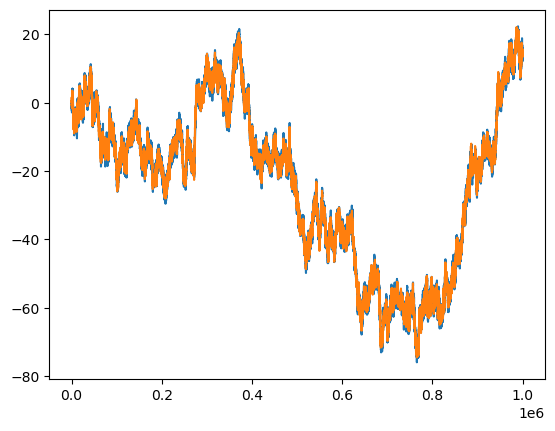

In [3]:
plt.plot(x)
plt.plot(_)

In [4]:
T_MBR = 10
t_MBR = np.linspace(0, T_MBR, int(T_MBR/dt))
analytical_MBR = analytical_mean_back_realxation(dt,T_MBR, k, d_particle, d_oscilator)

In [5]:
Tau = dt
multiplier = 1
simulation_MBR = mean_back_realxation(dt,x, Tau, T_MBR, multiplier=multiplier)

100%|██████████| 290951/290951 [00:01<00:00, 200828.92it/s]


In [6]:
N_seperate_trajectoris = 12
trajectories = [simulate_diffusing_harmonic(T_simulation/N_seperate_trajectoris, dt, k, d_particle, d_oscilator)[0] for _ in range(N_seperate_trajectoris)]

In [7]:
combined_mbr = mean_back_relaxation_multiple_trajectories(dt, trajectories,Tau, T_MBR, multiplier=multiplier)

100%|██████████| 12/12 [00:06<00:00,  1.81it/s]


In [14]:
dilution_factor = 0.5

x = np.array(x)
t = np.arange(0, dt*len(x), dt)
random_indeces = sorted(np.random.choice(len(x),int(len(x)*dilution_factor), replace=False))
diluted_x = x[random_indeces]
diluted_t = t[random_indeces]

In [15]:
mbr_diluted_time, mbr_diluted = mean_back_relaxation_with_timestamps(diluted_t, diluted_x, Tau, T_MBR, n_bins=100, tao_tollerance_factor=2)

100%|██████████| 135109/135109 [03:53<00:00, 579.63it/s]  


In [16]:
N_seperate_trajectoris = 12
diluted_x_seperated_list = np.array_split(diluted_x, N_seperate_trajectoris)
diluted_t_seperated_list = np.array_split(diluted_t, N_seperate_trajectoris)


In [17]:
mbr_diluted_seperated_time, mbr_diluted_seperated = mean_back_relaxation_multiple_trajectories_with_timestamps(diluted_t_seperated_list, diluted_x_seperated_list, Tau, T_MBR, n_bins=100, tao_tollerance_factor=2)

100%|██████████| 12/12 [00:09<00:00,  1.20it/s]


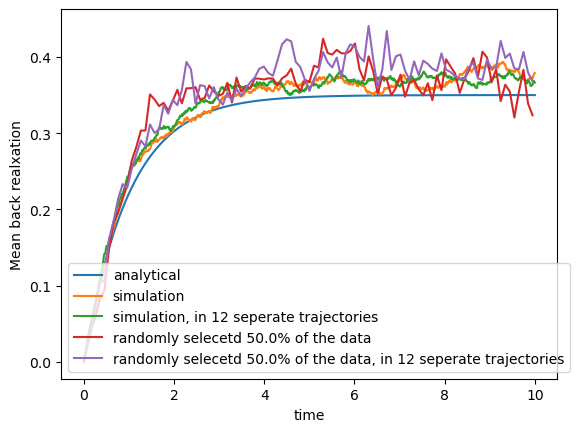

In [19]:
plt.plot(t_MBR,analytical_MBR, label='analytical')
plt.plot(t_MBR,simulation_MBR, label='simulation')
plt.plot(t_MBR,combined_mbr, label=f"simulation, in {N_seperate_trajectoris} seperate trajectories")
plt.plot(mbr_diluted_time, mbr_diluted, label=f"randomly selecetd {dilution_factor*100}% of the data")
plt.plot(mbr_diluted_seperated_time, mbr_diluted_seperated, label=f"randomly selecetd {dilution_factor*100}% of the data, in {N_seperate_trajectoris} seperate trajectories")
plt.xlabel('time')
plt.ylabel('Mean back realxation')
plt.legend()
plt.show()